<h1>Project (Google Play Store)<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Project-Description" data-toc-modified-id="Project-Description-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Project Description</a></span></li><li><span><a href="#Clean-Data" data-toc-modified-id="Clean-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Clean Data</a></span><ul class="toc-item"><li><span><a href="#Missing-or-Incorrect-Values" data-toc-modified-id="Missing-or-Incorrect-Values"><span class="toc-item-num">&nbsp;&nbsp;</span>Missing or Incorrect Values</a></span></li></ul></li><li><span><a href="#Observations" data-toc-modified-id="Observations-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Observations</a></span></li><li><span><a href="#Statistics" data-toc-modified-id="Statistics-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Statistics</a></span></li></ul></div>

In [36]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import plotly.express as px
%matplotlib inline
import seaborn as sns
from scipy.stats import ttest_rel, ttest_ind, ttest_1samp, norm, t, mode
import os
import re

my_colors = ['royalblue','seagreen','y', 'salmon','blueviolet','orangered' ,
                 'olive','deeppink', 'purple', 'gold', 'cyan' ]

In [37]:
os.listdir()

['.ipynb_checkpoints',
 'data',
 'Week 5-6 Google Player Store.ipynb',
 'Week5-6_Google_Player_Store.ipynb']

# Project Description

##### Motivation Behind The Project
   The goal of this project is to do a relatively simple, yet comprehensive analysis of the Android app market via comparing 10,000 apps in Google Play across different categories. As the result, this straightforward and common-sense analysis should give a broad picture of what the situation in Android app market looks like. Those findings in turn might provide some insights for people who are involved in market research or intersted in knowing what strategies to follow in order to launch and sustain a successful app in Android market.

##### Dataset Description
Original dataset contains the following files:
<ul> <li>googleplaystore.csv: Contains essential data about types and characteristics of applications listed in Google Play.</li>
<li>googleplaystore_user_reviews.csv: This is a pre-processed dataset that has been additionally equipped (based on actual reviews) with sentiment-related information about apps</li>
</ul>

In [38]:
df=pd.read_csv('data/googleplaystore.csv')

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


# Clean Data

In [40]:
playstore = df.copy() #copy dataframe in applications
playstore.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [41]:
playstore[playstore['Rating'].isnull()]
playstore[playstore.Type == '0']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


### Missing or Incorrect Values

In [42]:
"""
Change Type to Free for the Apps with Type=O
"""
playstore[playstore.Type.isna()] #we can see that for this app price is zero
playstore['Type'].fillna('Free', inplace=True)

playstore[playstore.Type == '0'] #we can see that for this app the values are not good in each columns so we will remove it
playstore.drop(playstore[playstore.Type == '0'].index,inplace=True)
playstore.Type.value_counts()

Free    10040
Paid      800
Name: Type, dtype: int64

In [43]:
"""
Remove rows with Category '1.9'
"""
playstore.Category.value_counts()
playstore.drop(playstore[playstore.Category == '1.9'].index,inplace=True)

In [44]:
playstore['Android Ver'].value_counts()
playstore['Current Ver'].value_counts()

Varies with device                                 1459
1.0                                                 809
1.1                                                 264
1.2                                                 178
2.0                                                 151
                                                   ... 
1.6.3.1                                               1
1.3.9b                                                1
4.9.8.1                                               1
FreeTimeApp-aosp_v3.14_Build-1.0.204367.0.13014       1
1.137.22                                              1
Name: Current Ver, Length: 2831, dtype: int64

In [45]:
"""
Change Android Verion to the version format
"""
def version_parser(v):
    x = re.findall(r'([\d.]+)', v)
    if x :
        return x[0]
    return v

playstore['Android Ver'] = playstore['Android Ver'].map(version_parser, na_action='ignore')
playstore['Android Ver'].fillna('unknown', inplace=True)

In [46]:
playstore['Android Ver'].value_counts()

4.1                   2452
4.0.3                 1503
4.0                   1375
Varies with device    1362
4.4                    992
2.3                    652
5.0                    605
4.2                    394
2.3.3                  281
2.2                    245
4.3                    243
3.0                    241
2.1                    134
1.6                    116
6.0                     60
7.0                     43
3.2                     36
2.0                     32
5.1                     24
1.5                     20
3.1                     10
2.0.1                    7
8.0                      6
7.1                      3
1.0                      2
unknown                  2
Name: Android Ver, dtype: int64

In [47]:
"""
App with the largest number of installs, and I removed +
"""
playstore['Installs'] = playstore['Installs'].apply(lambda x : x.strip('+').replace(',', ''))

In [48]:
playstore['Installs'] = playstore['Installs'].astype(int)

In [49]:
playstore.isin(['Varies with device']).sum()

App                  0
Category             0
Rating               0
Reviews              0
Size              1695
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver       1459
Android Ver       1362
dtype: int64

#### So, I cleaned the data and dropped around 1000 rows which contained 'Varies with device' in Size and Current Ver. I will remove all the case for size

In [50]:
"""
Remove Apps with unknown size and current ver
"""
playstore.drop(playstore[(playstore.Size == 'Varies with device')].index,inplace=True)

In [51]:
playstore.isin(['Varies with device']).any()

App               False
Category          False
Rating            False
Reviews           False
Size              False
Installs          False
Type              False
Price             False
Content Rating    False
Genres            False
Last Updated      False
Current Ver        True
Android Ver        True
dtype: bool

In [52]:
playstore.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs            int32
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [53]:
playstore.isna().sum()

App                  0
Category             0
Rating            1416
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          0
dtype: int64

#### for Rating column we have 1416 nan, remove them or raplace with mean or mode of Ratings????

In [54]:
playstore[playstore.Rating.isna()]

t_data=playstore[pd.notnull(playstore['Rating'])]
# mean,median,mode
rt_mean=np.mean(t_data['Rating'])
rt_median=np.median(t_data['Rating'])
rt_mode=mode(t_data['Rating'])

print(rt_mean,rt_median,rt_mode)
playstore['Rating'].fillna(rt_mean, inplace=True)

4.173851727260969 4.3 ModeResult(mode=array([4.4]), count=array([835]))


#### We have also 3.4% of rows duplicated, so we will remove them

In [55]:
playstore.duplicated().sum()
(playstore.duplicated().value_counts()/playstore.shape[0])*100

False    96.56643
True      3.43357
dtype: float64

In [56]:
playstore.drop_duplicates(inplace=True) 

In [57]:
playstore.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       0
dtype: int64

In [58]:
playstore.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8831 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8831 non-null   object 
 1   Category        8831 non-null   object 
 2   Rating          8831 non-null   float64
 3   Reviews         8831 non-null   object 
 4   Size            8831 non-null   object 
 5   Installs        8831 non-null   int32  
 6   Type            8831 non-null   object 
 7   Price           8831 non-null   object 
 8   Content Rating  8831 non-null   object 
 9   Genres          8831 non-null   object 
 10  Last Updated    8831 non-null   object 
 11  Current Ver     8823 non-null   object 
 12  Android Ver     8831 non-null   object 
dtypes: float64(1), int32(1), object(11)
memory usage: 931.4+ KB


In [59]:
# converting review to int
playstore['Reviews']=playstore['Reviews'].astype('int')

In [60]:
"""
Change Last Updated to datetime format
"""
playstore['Last Updated'] = pd.to_datetime(playstore['Last Updated'])


#### Column Size is another data of type object. Although it makes perfect sense, since it specifies size of an app in Megabytes or Kilobytes, it is still better to convert them to a numeric type column, since Size column will definitely be used in the upcoming analysis.

After looking at the data inside Size column, I arrived to the conclusion that the best way would be to express everything in terms of MB, since this is a standard unit of measure of mobile app's size. 
Additionally, since their approximate values are unknown, replace "Varies with device" values ???

In [61]:
"""
Converting Size of applications to numeric
"""
playstore['Size'].replace('Varies with device',np.nan)
playstore['Size'] = playstore['Size'].apply(lambda x: str(x).replace('+',''))

playstore['Size']=playstore['Size'].str.replace('M','').str.replace('k','e-3').astype('float').round(2)


In [62]:
"""
Converting Price of applications to numeric
"""
playstore['Price'].value_counts()
playstore['Price']=playstore.Price.str.lstrip('$').astype(float)

In [63]:
playstore_summary=playstore.describe().T

#### To remove the outliers of prices >5% and <95% percentile:

In [103]:
playstore=playstore[playstore.Price < playstore.Price.quantile(.95)]

In [106]:
playstore.Price.value_counts()

0.00    8140
0.99     143
1.49      43
1.00       3
1.70       2
1.20       1
1.59       1
1.61       1
1.04       1
1.26       1
1.29       1
1.96       1
1.97       1
1.76       1
1.75       1
1.50       1
Name: Price, dtype: int64

```sql
playstore_summary['IQR']=playstore_summary['75%']-playstore_summary['25%']
playstore_summary['cutoff']=playstore_summary.IQR*1.95
playstore_summary['lw']=playstore_summary['25%']-playstore_summary.cutoff
playstore_summary.head()

outliers=pd.DataFrame(columns=playstore.columns)

#loop to detect outliers in each column
for col in playstore_summary.index:
   
    lower=playstore_summary.at[col,'lw'] #get upper whisker for this column
    results=playstore[(playstore[col]<lower)].copy() #get the dataframe
    results['Outlier']=col #to be able to identify in which column we obtained outliers
    outliers=outliers.append(results) #save them

data1=playstore.drop(outliers.index)
print('shape after dropping changed:', data1.shape)```

# Observations

##### Overview and Questions¶
<ol>
<li>What kind of apps have the highest market share?</li>
<li>Is there any specific category (ex: Health, Games, Entertainment) dominating the market?</li>
<li>Which categories have the fewest the number of apps available?</li>
<li>What is the average rating accross all apps in the Google Play market?</li>
<li>Does the size of an app affect its rating?</li>
<li>Do users really care about system-heavy apps at all or they only prefer having light-weight apps?</li>
<li>Does the price of an app affect its rating?</li>
<li>Do users always prefer free apps over paid apps?</li>
</ol>

In [142]:
playstore.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

### App vs Installs

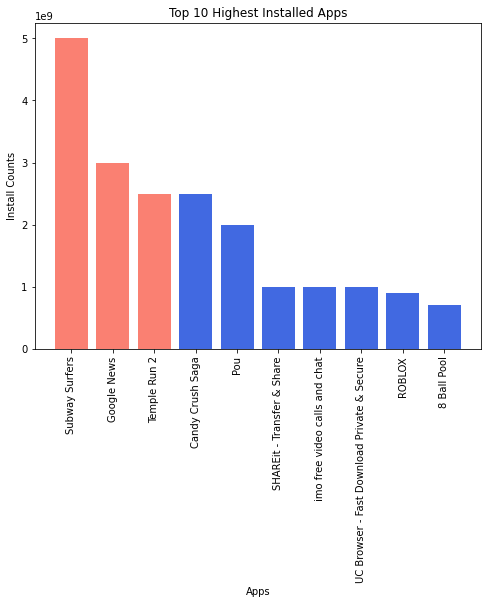

In [148]:
App_installed = playstore.groupby('App')['Installs'].sum().reset_index()
final_result = App_installed.sort_values(by = 'Installs', ascending = False).head(10)

plt.figure(figsize=(8,6))

plt.bar(final_result.App[:3], final_result.Installs[:3], color=my_colors[3])
plt.bar(final_result.App[3:], final_result.Installs[3:], color=my_colors[0])
plt.xlabel("Apps")
plt.xticks(rotation = 90)
plt.ylabel("Install Counts")
plt.title("Top 10 Highest Installed Apps")
plt.show()

### App vs Reviews

Text(0.5, 1.0, 'Most Popular Categories in Play Store')

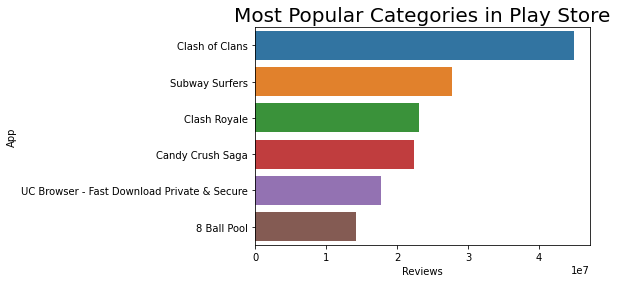

In [164]:
app_reviews = playstore.sort_values(['Reviews'],ascending = 0 )[:20]
ax = sns.barplot(x = 'Reviews' , y = 'App' , data = app_reviews )
ax.set_xlabel('Reviews')
ax.set_ylabel('App')
ax.set_title("Most Popular Categories in Play Store", size = 20)

### Apps in Category

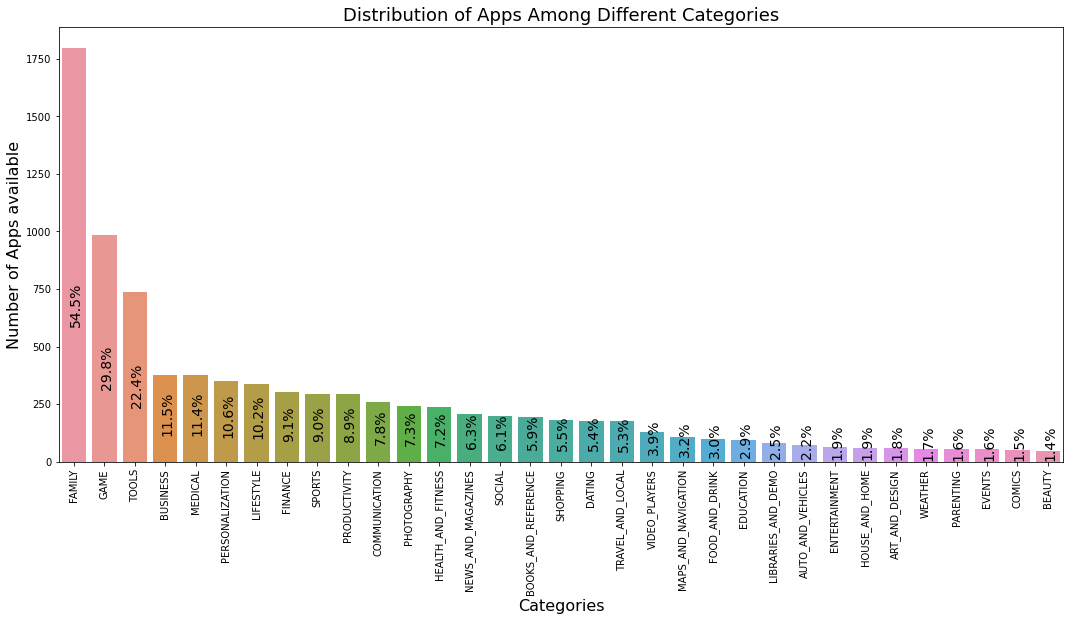

In [247]:
### total number of unique categories
number_of_categories = len(playstore['Category'].unique())

### Count the number of apps in each 'Category' and sort them in descending order
num_of_apps_in_each_category = playstore['Category'].value_counts().sort_values(ascending = False)

### Plot of the results
plt.figure(figsize=(18,8))
plot_apps_in_categories = sns.barplot(
         x = num_of_apps_in_each_category.index,  # index = category name
         y = num_of_apps_in_each_category.values, # value = count for each category
                    )

### This makes the plot to look more appealing
plot_apps_in_categories.set_xticklabels(plot_apps_in_categories.get_xticklabels(), rotation=90, horizontalalignment='center')
plt.xlabel(xlabel='Categories', fontsize = 16)
plt.ylabel(ylabel='Number of Apps available', fontsize = 16)
plt.title("Distribution of Apps Among Different Categories", fontsize = 18)

### Let's add percentages to the plot, since this will facilitate interpreation of the findings
def add_percentages(plot, column):
    total = len(column)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(p.get_height()/total)
        x = p.get_x() + p.get_width() / 1.7   # This part defines a horizontal position of the output relative to a respective bar
        y = p.get_y() + p.get_height()/3.0    # This part defines a vertical position of the output relative to a respective bar
        plot.annotate(percentage, (x, y), size = 14,  rotation=90, horizontalalignment='center')
        
add_percentages(plot_apps_in_categories, num_of_apps_in_each_category.values)

### Finally, let us see how the re

Thus, among 33 different app categories present in Google Play Store, Family, Game, Tools, Business and Medical are the top 5 categories that have the highest market prevalence (in a sense that they have the highest share of apps available). On the other hand, apps in Art and Design, Events, Comics, Parenting and Beauty categories have the fewest number of apps available for download.

### Category vs Installs

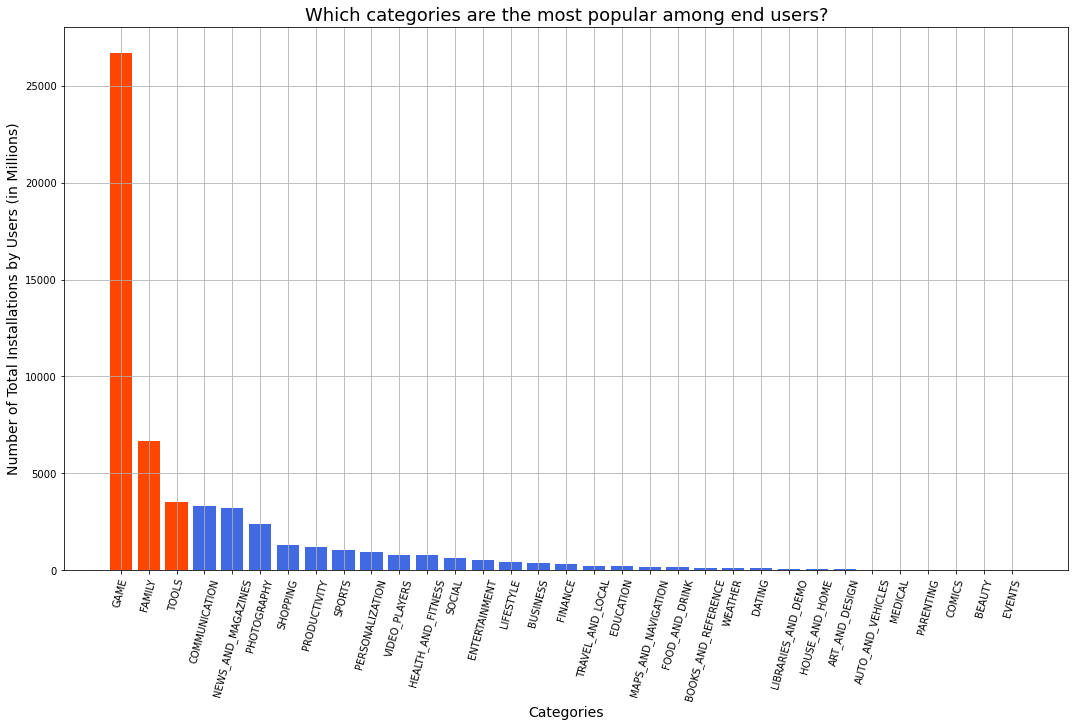

In [259]:
catg_installed = playstore.groupby('Category')['Installs'].sum().sort_values(ascending = False)
# Now, since the resulting numbers are hard to read, I will express them in millions notation.
catg_installed_per_million = catg_installed.div(1000_000).round().astype(int)

plt.figure(figsize=(18,10))
plt.bar(catg_installed_per_million.index[:3], catg_installed_per_million.values[:3], color=my_colors[5])
plt.bar(catg_installed_per_million.index[3:], catg_installed_per_million.values[3:], color=my_colors[0])

plt.xlabel(xlabel='Categories', fontsize = 14)
plt.ylabel(ylabel='Number of Total Installations by Users (in Millions)', fontsize = 14)
plt.title("Which categories are the most popular among end users?", fontsize = 18)
plt.grid()
plt.xticks(rotation = 75)
plt.show()

### Genres

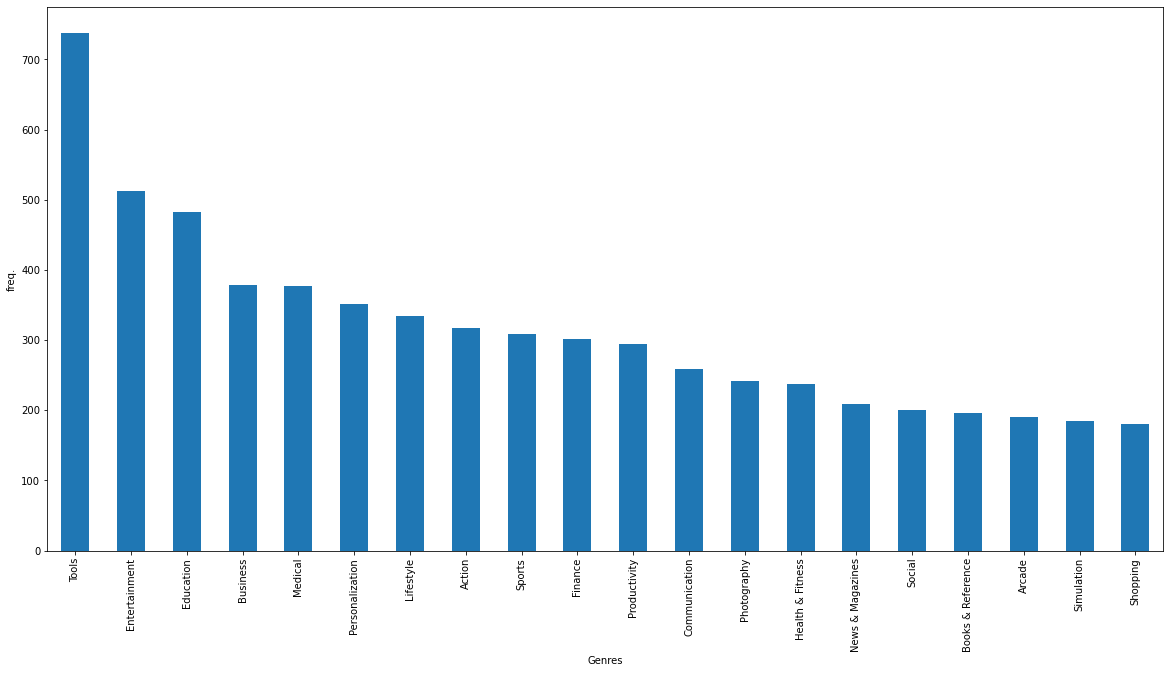

In [160]:
plt.figure(figsize=(20,10))
playstore['Genres'].value_counts().head(20).plot(kind='bar')
plt.xlabel('Genres')
plt.ylabel('freq.')
plt.show()

### Cenres vs Installs

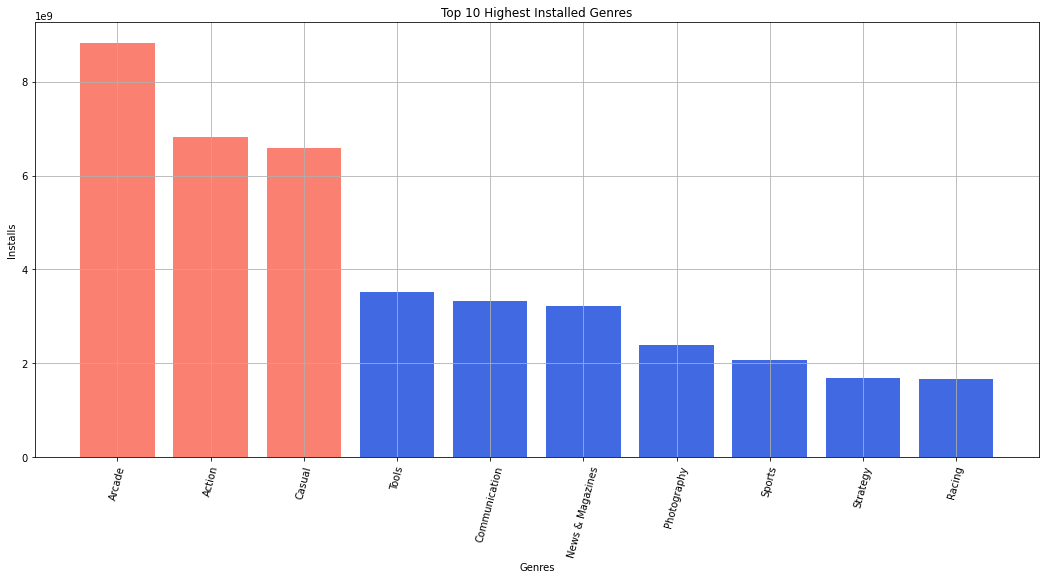

In [163]:
genr_installed = playstore.groupby('Genres')['Installs'].sum().reset_index().sort_values(by = 'Installs', ascending = False).head(10)

plt.figure(figsize=(18,8))
plt.bar(genr_installed.Genres[:3], genr_installed.Installs[:3], color=my_colors[3])
plt.bar(genr_installed.Genres[3:], genr_installed.Installs[3:], color=my_colors[0])
plt.xlabel('Genres')
plt.ylabel('Installs')
plt.title("Top 10 Highest Installed Genres")
plt.grid()
plt.xticks(rotation = 75)
plt.show()

### Size

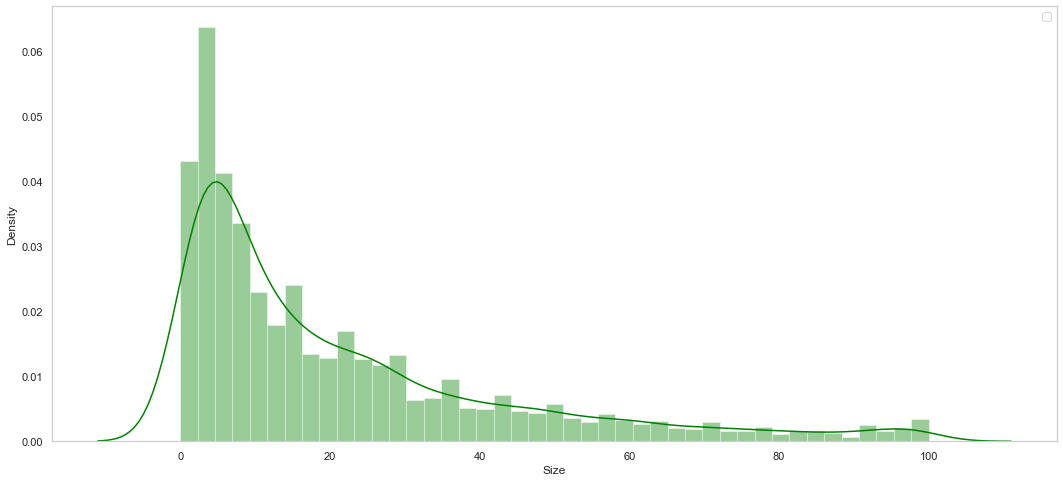

In [290]:
plt.figure(figsize=(18,8))
sns.distplot(playstore.Size , color="green", label=playstore.Category)
plt.legend('')
plt.grid()
plt.show()

### Rating

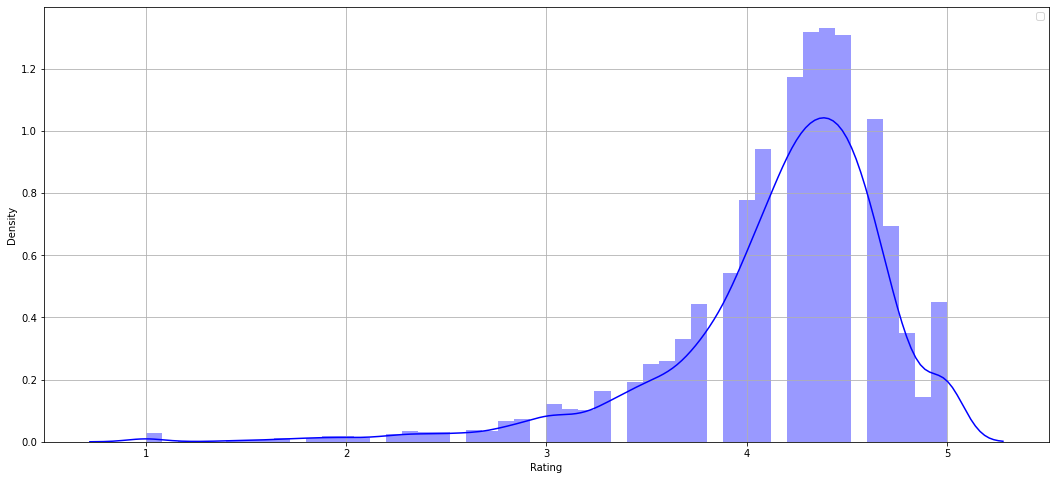

In [173]:
#catg_rating = playstore.groupby('Category')['Rating'].sum().reset_index()
plt.figure(figsize=(18,8))

sns.distplot(playstore.Rating , color="blue", label=playstore.Category)
plt.legend('')
plt.grid()
plt.show()

### Distribution of Ratings

Mean app rating = 4.21
Median app rating = 4.4


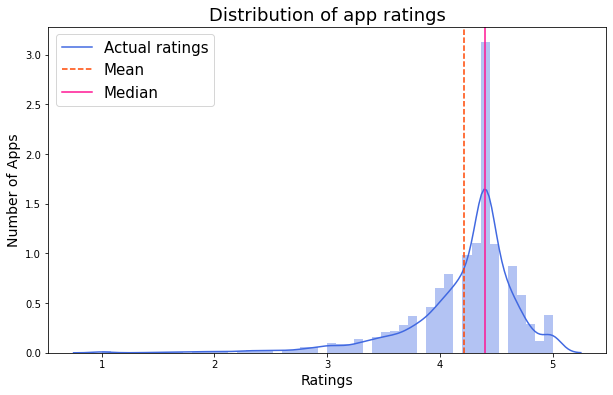

In [267]:
# Average and median rating of apps
mean = round(playstore['Rating'].mean(), 2)
median = round(playstore['Rating'].median(), 2)

print(f'Mean app rating = {mean}', f'Median app rating = {median}',sep= '\n')

# Distribution of apps according to their ratings
rating_histogram = sns.distplot(playstore["Rating"], kde = True, color=my_colors[0])

rating_histogram.axvline(mean, color=my_colors[5], linestyle='--')
rating_histogram.axvline(median, color=my_colors[7], linestyle='-')
plt.legend({'Actual ratings': rating_histogram, 'Mean':mean,'Median':median})
plt.gcf().set_size_inches( 10, 6)
plt.xlabel("Ratings", fontsize = 14)
plt.ylabel("Number of Apps", fontsize = 14)
plt.title('Distribution of app ratings', fontsize = 18)

plt.show()

Based on this data, one can infer that the average rating across all app categories is 4.19 out of 5. The histogram plot is skewed to the left indicating that the majority of the apps are highly rated with only a few exceptions in the low-rated apps.

### Rating vs Size

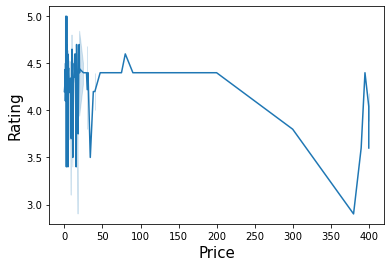

In [246]:
sns.lineplot(x= playstore.Price , y= playstore.Rating )

### Rating vs Reviews

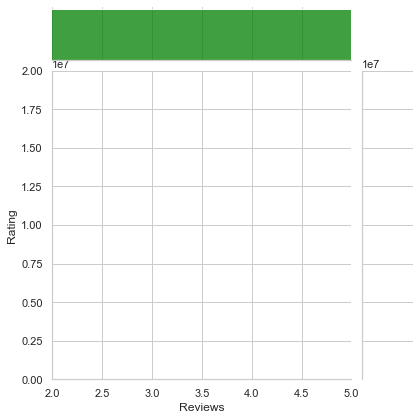

In [291]:
sns.jointplot(x='Rating',y='Reviews',data=playstore,kind='hex',color='Green',xlim={2,5},ylim={0,20000000})

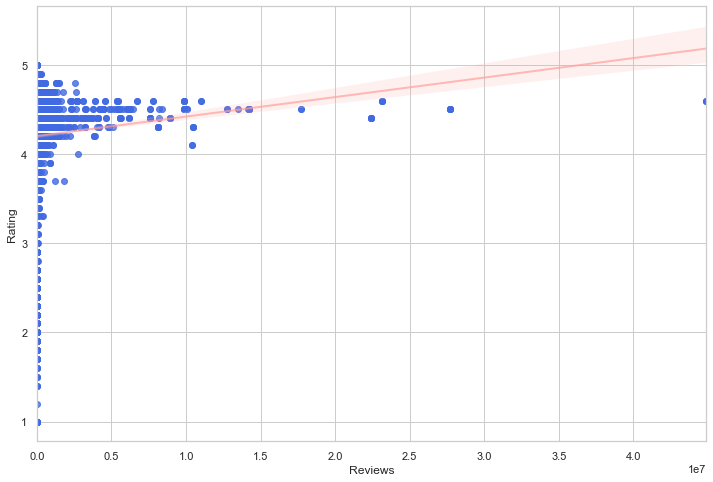

In [296]:
plt.figure(figsize=(12,8))
sns.regplot(x='Reviews', y='Rating',data=playstore,color=my_colors[0], line_kws={"color":"r","alpha":0.7,"lw":2})

<ul><li>Most of the applications have reviews' count below 1000000 if we shun the outliers.</li>
<li>Apps scoring high on ratings generally have high Reviews
</li></ul>

[(0.0, 1000000.0)]

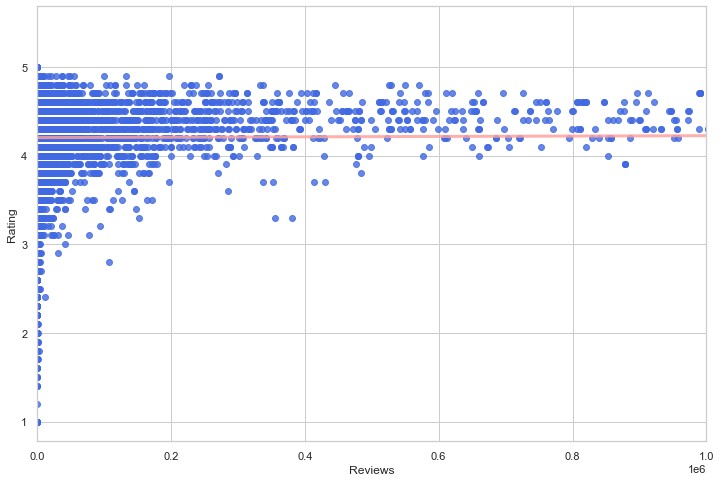

In [300]:
plt.figure(figsize=(12,8))
g = sns.regplot(x='Reviews', y='Rating',data=playstore,color=my_colors[0],
            line_kws={"color":"r","alpha":0.8,"lw":3})
g.set(xlim=(0, 1000000))

<Figure size 1296x576 with 0 Axes>

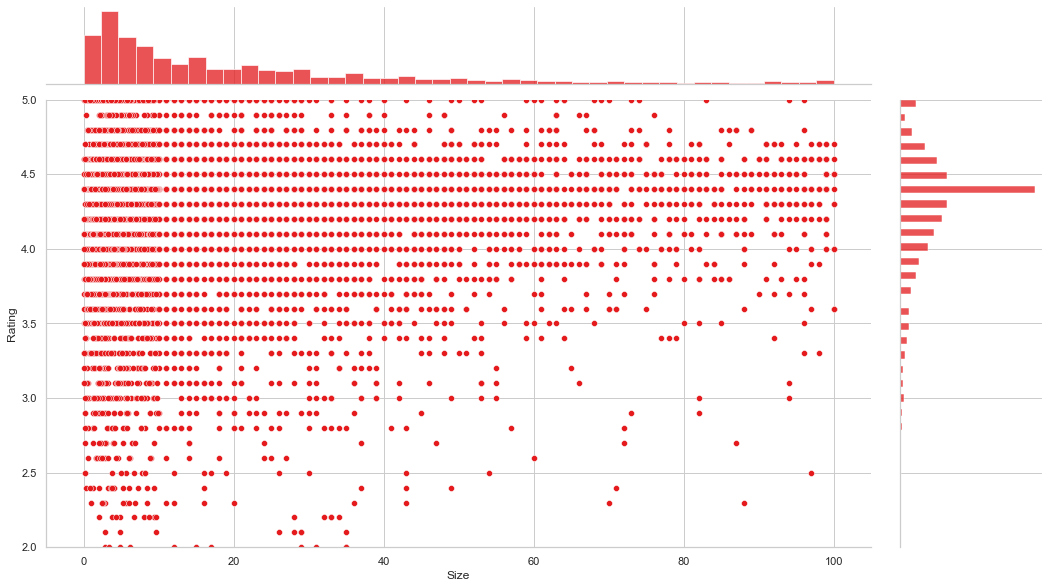

In [315]:
plt.figure(figsize=(18,8))
g = sns.jointplot(x='Size',y='Rating',data=playstore,ylim={2,5}, palette='Set1')
g.fig.set_figwidth(16.27)
g.fig.set_figheight(8.7)
plt.show()

Lighter Apps seems to be more popular than heavier ones!

### Category(free vs paid) vs Rating 

In [179]:
def compute_app_types(df):
    """
    Given a dataframe, compute the number 
    of free and paid apps respectively
    """
    return sum(df.Type == "Free"), sum(df.Type == 'Paid')

def plot_app_types(df):
    """
    Plot app type distributions across categories
    """
    vc_rating = df.Category.value_counts()
    cat_free_apps = []
    cat_paid_apps = []
    for cat in vc_rating.index:
        n_free, n_paid = compute_app_types(df.query("Category == '{}'".format(cat)))
        cat_free_apps.append(n_free)
        cat_paid_apps.append(n_paid)

    f, ax = plt.subplots(2,1)
    ax[0].bar(range(1, len(cat_free_apps)+1), cat_free_apps)
    ax[1].bar(range(1, len(cat_free_apps)+1), cat_paid_apps)

def plot_target_by_group(df, target_col, group_col, figsize=(6,4), title=""):
    """
    Plot the mean of a target column (Numeric) groupped by the group column (categorical)
    """
    order = sorted(list(set(df[group_col])))
    stats = df.groupby(group_col).mean()[target_col]
    fig, ax = plt.subplots(figsize=figsize)
    sns.barplot(x=group_col, y=target_col, data=df, ax=ax, order=order).set_title(title)
    ax.set(ylim=(3.8, 4.5))  
    ax.tick_params(labelrotation=90)
    return stats

[Text(0, 0, 'ART_AND_DESIGN'),
 Text(0, 0, 'AUTO_AND_VEHICLES'),
 Text(0, 0, 'BOOKS_AND_REFERENCE'),
 Text(0, 0, 'BUSINESS'),
 Text(0, 0, 'COMMUNICATION'),
 Text(0, 0, 'DATING'),
 Text(0, 0, 'EDUCATION'),
 Text(0, 0, 'ENTERTAINMENT'),
 Text(0, 0, 'EVENTS'),
 Text(0, 0, 'FAMILY'),
 Text(0, 0, 'FINANCE'),
 Text(0, 0, 'FOOD_AND_DRINK'),
 Text(0, 0, 'GAME'),
 Text(0, 0, 'HEALTH_AND_FITNESS'),
 Text(0, 0, 'LIBRARIES_AND_DEMO'),
 Text(0, 0, 'LIFESTYLE'),
 Text(0, 0, 'MAPS_AND_NAVIGATION'),
 Text(0, 0, 'MEDICAL'),
 Text(0, 0, 'NEWS_AND_MAGAZINES'),
 Text(0, 0, 'PARENTING'),
 Text(0, 0, 'PERSONALIZATION'),
 Text(0, 0, 'PHOTOGRAPHY'),
 Text(0, 0, 'PRODUCTIVITY'),
 Text(0, 0, 'SHOPPING'),
 Text(0, 0, 'SOCIAL'),
 Text(0, 0, 'SPORTS'),
 Text(0, 0, 'TOOLS'),
 Text(0, 0, 'TRAVEL_AND_LOCAL'),
 Text(0, 0, 'VIDEO_PLAYERS'),
 Text(0, 0, 'WEATHER')]

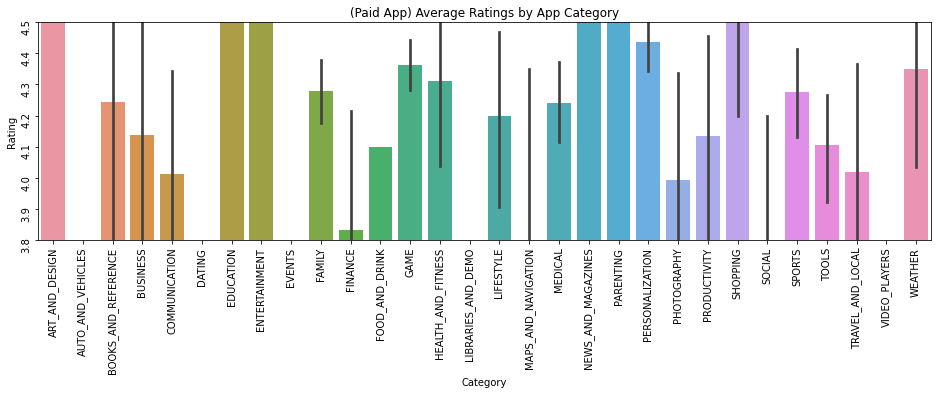

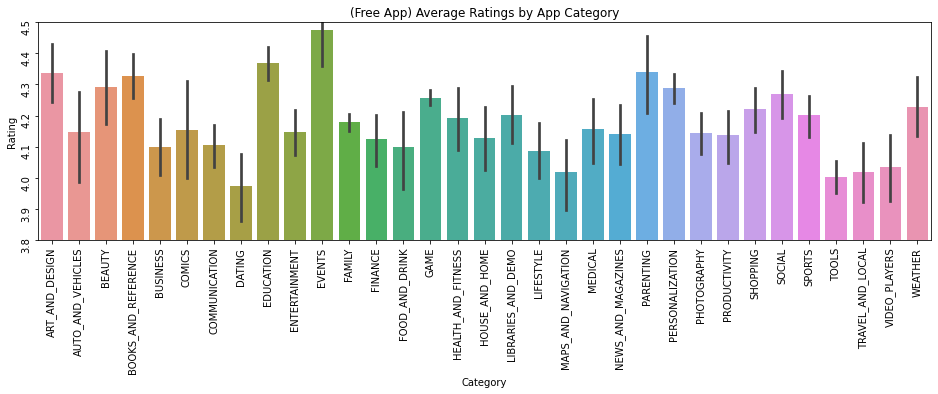

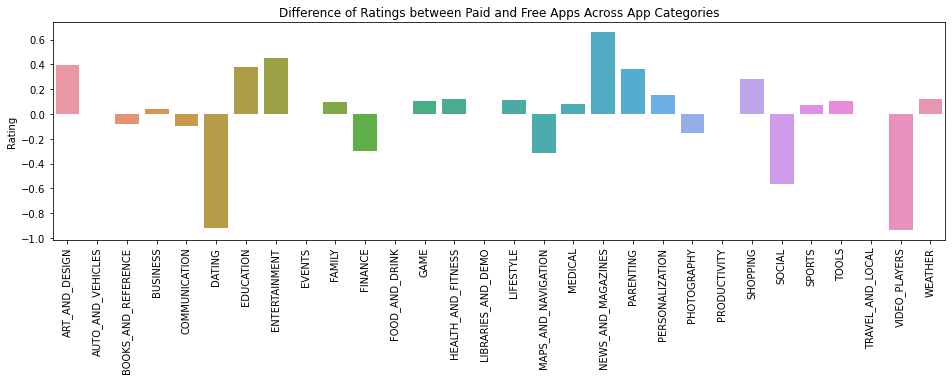

In [180]:
data_filter = playstore[['Rating', 'Type', 'Category']]
"""
Rating Distribution based on Free and Paid Apps
"""
paid_stats = plot_target_by_group(data_filter.query('Type == "Paid"'), 'Rating', 'Category', (16, 4), "(Paid App) Average Ratings by App Category")
free_stats = plot_target_by_group(data_filter.query('Type == "Free"'), 'Rating', 'Category', (16, 4), "(Free App) Average Ratings by App Category")


fig, ax = plt.subplots(figsize=(16,4))
sorted_idx = sorted(paid_stats.index)
rating_diff = paid_stats[sorted_idx] - free_stats[sorted_idx]
g = sns.barplot(x=sorted_idx, y=rating_diff, ax=ax)
g.set_title("Difference of Ratings between Paid and Free Apps Across App Categories");

g.set_xticklabels(g.get_xticklabels(), rotation=90)

### Paid vs Free Apps

As the next logical step, let us examine whether there is a significant difference in popularities between free and paid apps. 

Questions:
<ol><li>Is it the case that in Android world paid apps are (on average) demanded as much as free apps are? If not, how big is the divergence?</li>
<li>Do commercial mobile apps receive higher ratings when compared to free apps in the same category?</li></ol>

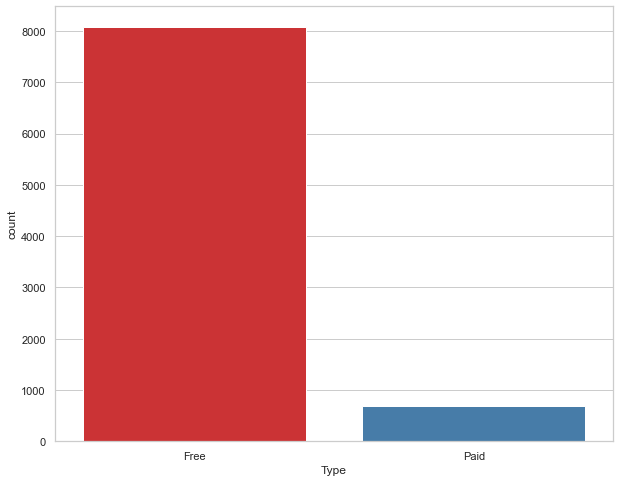

In [286]:
#Count of free vs paid apps
plt.figure(figsize=(10,8))
sns.set(style="whitegrid",palette="Set1")
sns.countplot(playstore["Type"])

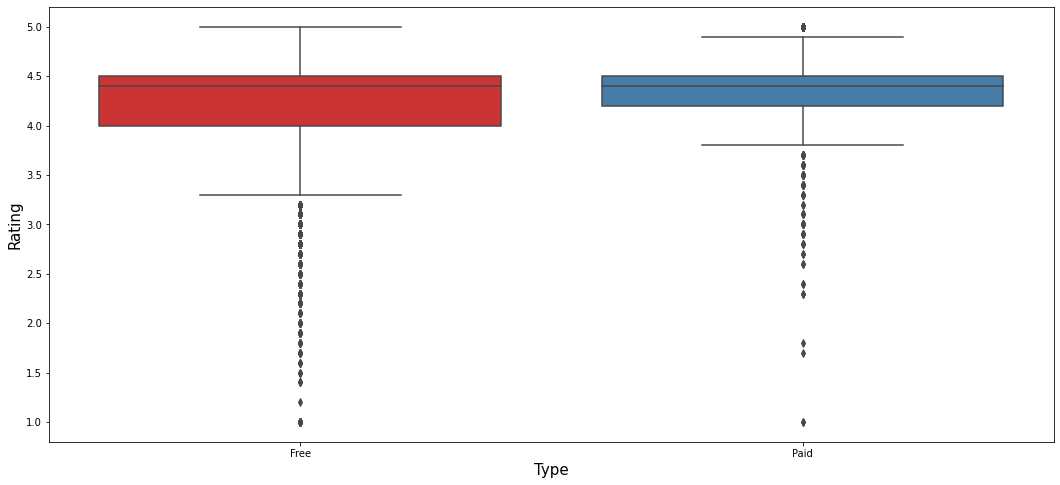

In [274]:
playstore.Type.unique()
plt.figure(figsize=(18,8))
sns.boxplot(x=playstore.Type, y=playstore.Rating, palette="Set1")
#plt.legend('')
plt.show()

### Correlations

In [189]:
playstore.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.080496,0.082674,0.053881,-0.021891
Reviews,0.080496,1.000000,0.238023,0.645148,-0.009651
Size,0.082674,0.238023,1.000000,0.166174,-0.023627
Installs,0.053881,0.645148,0.166174,1.000000,-0.010153
Price,-0.021891,-0.009651,-0.023627,-0.010153,1.000000


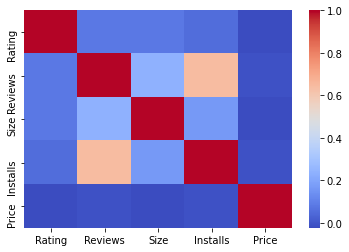

In [193]:
sns.heatmap(playstore.corr(), cmap='coolwarm')

In [192]:
playstore.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

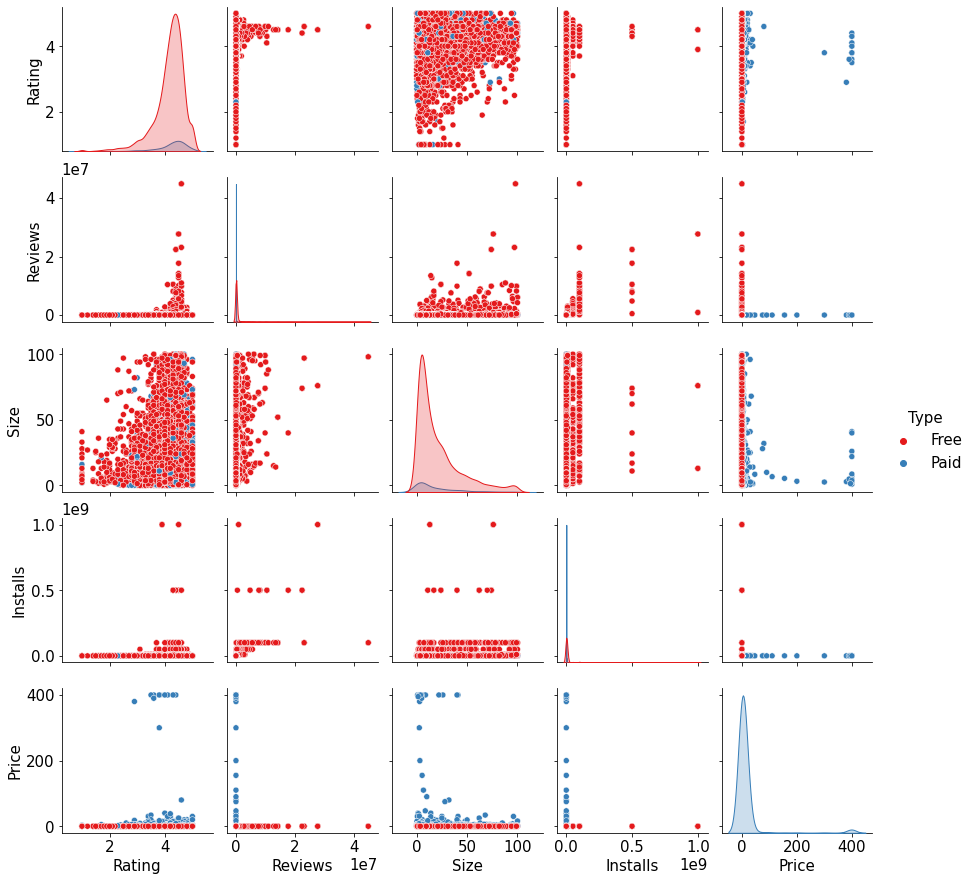

In [197]:
# Pair plot
rc={'axes.labelsize': 15, 'font.size': 15, 'legend.fontsize': 15.0, 'axes.titlesize': 15, 'figure.figsize':(20.7,20.27)}
plt.rcParams.update(**rc)
cols= playstore[[ 'App', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
                   'Price', 'Content Rating']]
cols.head()
g = sns.pairplot(data=cols, hue='Type', dropna='true', palette='Set1')

# Statistics